## Check if I get better profiles when only probe P20 is connected 

### Conduino measurements
Conduino measurements

|Code|configuration|file|
|:-:|:-------:|:--:|
|a|P20 w/tip out of water||
|b|P20 w/tip just below water|.mat|
|c|No probes, only cables|.mat|
|d|ANK1 and 2 (density samples)|.mat|
|e|ANK1 and 2 repeat|.mat|
|f|P20 w/tip out of water repeat|.mat|
|g|P20 w/tip out of water repeat|.mat|


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### All profiles

Text(0.5,0,'time / s')

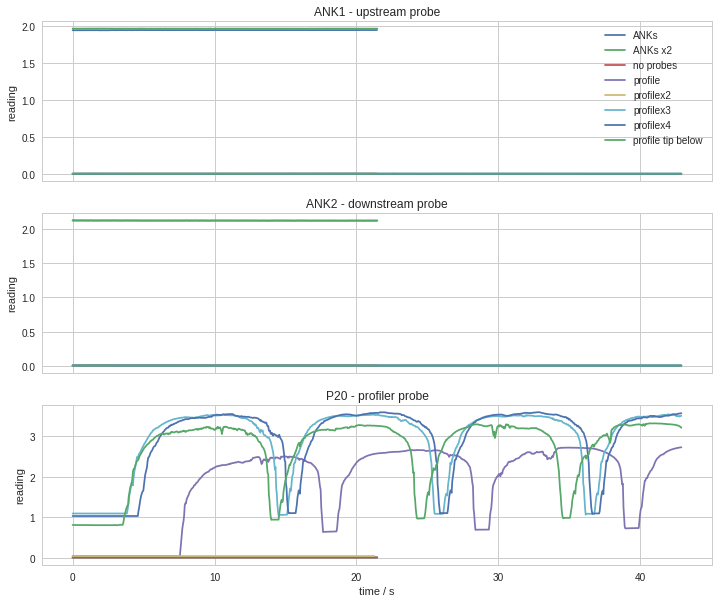

In [4]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharex=True)

labels = ['ANKs','ANKs x2','no probes', 'profile', 'profilex2','profilex3','profilex4','profile tip below'] 
   
filepaths = ['../calibration_independent_12jul19/ANK1_ANK2.mat',
             '../calibration_independent_12jul19/ANK1_ANK2_2.mat',
             '../calibration_independent_12jul19/no_probes_only_cables.mat',
             '../calibration_independent_12jul19/P20_profiles_air_top.mat',
             '../calibration_independent_12jul19/P20_air.mat',
             '../calibration_independent_12jul19/P20_air_top_2.mat',
             '../calibration_independent_12jul19/P20_air_top_3.mat',
             '../calibration_independent_12jul19/P20_profiles_tip_below.mat'
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']

    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

### ANK probes


(1.008, 1.0126)

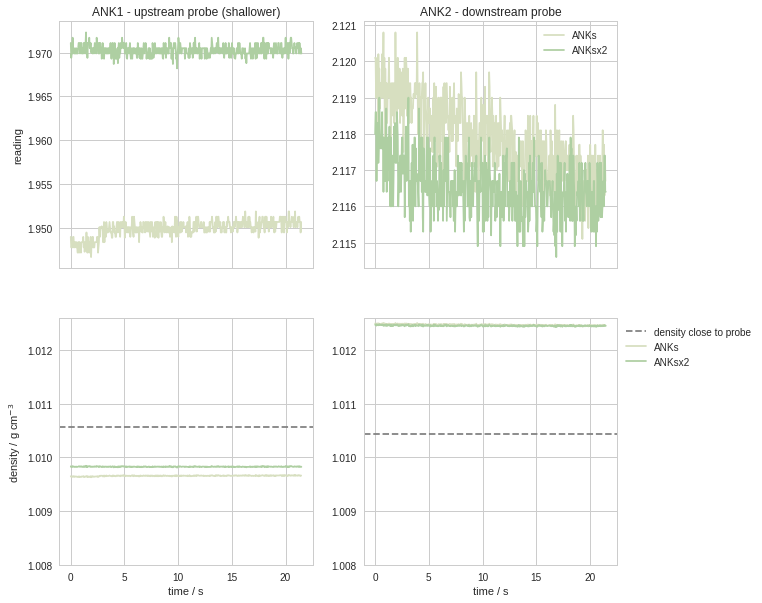

In [5]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,10), sharex=True)
ax2.axhline(1.010564,color='0.5', linestyle='--', label='density close to probe')
ax3.axhline(1.010426,color='0.5', linestyle='--', label='density close to probe')

labels = ['ANKs', 'ANKsx2']

filepaths = ['../calibration_independent_12jul19/ANK1_ANK2.mat',
             '../calibration_independent_12jul19/ANK1_ANK2_2.mat'
             ]
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
   
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,ctools.densANK1_12Jul19(P1), label=lab)
    ax3.plot(time,ctools.densANK2_12Jul19(P2), label=lab)
   
ax1.legend(bbox_to_anchor=(1,1))
ax3.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe (shallower)')
ax1.set_title('ANK2 - downstream probe')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax2.set_ylim(1.008,1.0126)
ax3.set_ylim(1.008,1.0126)

### Profiles

Text(0.5,0,'time / s')

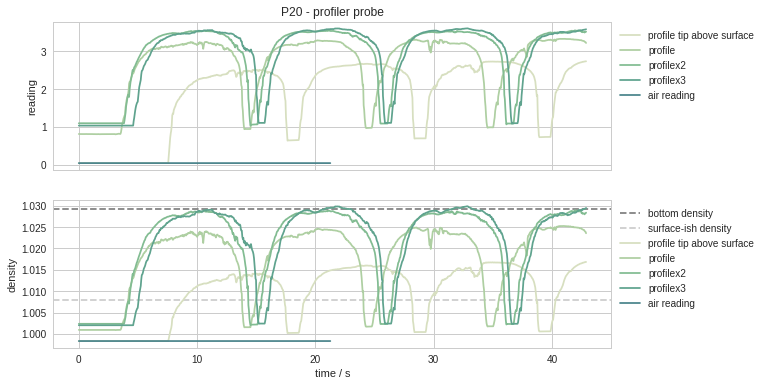

In [6]:
fig, (ax2,ax3) = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax3.axhline(1.02927,color='0.5', linestyle='--', label='bottom density')
ax3.axhline(1.00804,color='0.8', linestyle='--', label='surface-ish density')

labels = ['profile tip above surface','profile','profilex2','profilex3','air reading',]

filepaths = ['../calibration_independent_12jul19/P20_profiles_air_top.mat',
             '../calibration_independent_12jul19/P20_profiles_tip_below.mat',
             '../calibration_independent_12jul19/P20_air_top_2.mat',
             '../calibration_independent_12jul19/P20_air_top_3.mat',
             '../calibration_independent_12jul19/P20_air.mat',]

ini_indices = [0,0,0,0,0,0]
sns.set_palette(sns.hls_palette(len(filepaths), l=.5, s=0.5))
for filepath, lab, ind in zip(filepaths, labels, ini_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']#dens_C(mat['ch2'])
    densP3 = ctools.densP_12Jul19(P3)
    time = mat['time']
    ax2.plot(time[ind:]-time[ind],P3[ind:], label=lab)
    ax3.plot(time[ind:]-time[ind],densP3[ind:], label=lab)


ax2.legend(bbox_to_anchor=(1,1))
ax3.legend(bbox_to_anchor=(1,1))
ax2.set_ylabel('reading')
ax2.set_title('P20 - profiler probe')
ax3.set_ylabel('density')
ax3.set_xlabel('time / s')

### Convert time to profiler distance

No handles with labels found to put in legend.


Text(0.5,0,'time / s')

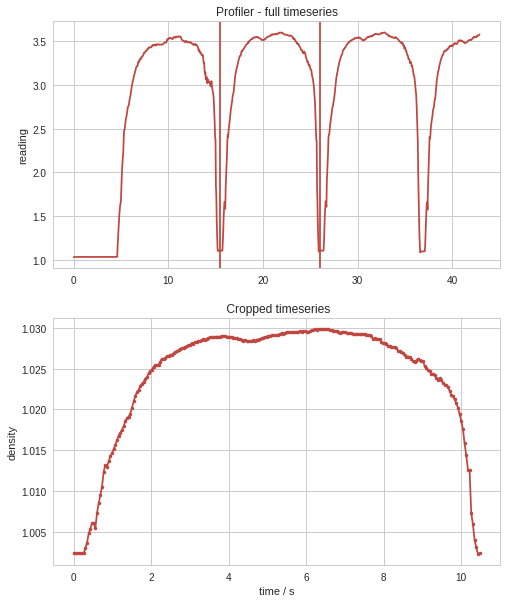

In [7]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10))

filepaths = ['../calibration_independent_12jul19/P20_air_top_3.mat' 
            ]
ini_indices = [360]
end_indices = [605]

for filepath, ind, end in zip(filepaths, ini_indices, end_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time[:],P3[:])
    ax0.axvline(time[ind])
    ax0.axvline(time[end])
    
    ax1.plot(time[ind:end]-time[ind],ctools.densP_12Jul19(P3[ind:end]),'.-')
    
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density')

ax0.set_title('Profiler - full timeseries')
ax1.set_title(' Cropped timeseries')
ax1.set_xlabel('time / s')

OSError: File b'../profiler_tracking_11jun19.txt' does not exist

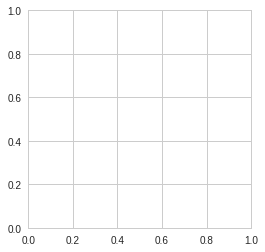

In [8]:
filepath = '../calibration_independent_12jul19/P20_air_top_3.mat'   
ini = 360
end = 605

fig, ax = plt.subplots(1,1,figsize=(4,4))
mat = sio.loadmat(filepath, squeeze_me=True)
P3 = mat['ch3'] #dens_C(mat['ch2'])
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_11jun(time_int)

ax.plot(ctools.densP_12Jul19(P3[ind:end]),dist_int, label='profiler', color='yellowgreen')
ax.scatter(1.00893,-3.0, marker='^', color='purple')
ax.scatter(1.01519,-9.6, marker='^', color='purple')
ax.scatter(1.00445,-0.2, marker='^', color='purple')

ax.annotate('downcast', xy=(1.0275, -3.5), xytext=(1.015, -6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('upcast', xy=(1.025, -1.5), xytext=(1.025, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )